# Neural Networks (morning)

J.F. Omhover, Oct 18 2016

### Objectives (morning)

* plot decision boundaries for perceptron / multilayer perceptron
* define and implement the perceptron learning algorithm
* define and implement the multi-layer perceptron algorithm
* define and experiment the parameters of the MLP


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

## 0. Generating a dataset for the lecture

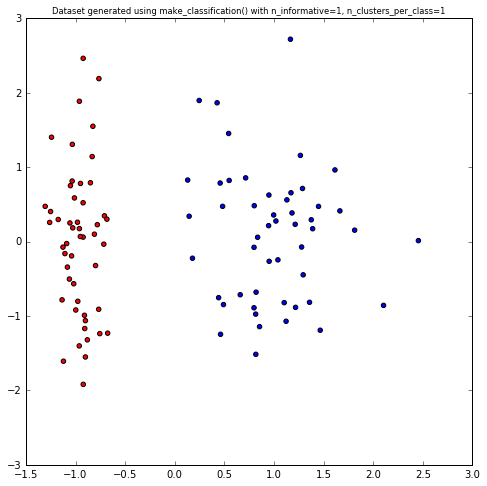

In [26]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

np.random.seed(42) # so that we see the same thing

plt.figure(figsize=(8, 8))
plt.title("Dataset generated using make_classification() with n_informative=1, n_clusters_per_class=1", fontsize='small')

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

def le_rouge_et_le_bleu(y):
    return ['b' if y[i] == 1 else 'r' for i in range(len(y))]
    
plt.scatter(X[:, 0], X[:, 1], marker='o', c=le_rouge_et_le_bleu(y))

We will use the following function to plot the decision boundaries of our classifiers.

In [27]:
def decision_boundary_2d(clf, X, Y, name, h=.02):
    """Inputs:
        clf - a trained classifier, with a predict method
        X - a dataset
        Y - the expected class for X
        name - the name of the classifier
        h - the step for meshgrid
    """
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(7, 7))
    plt.pcolormesh(xx, yy, Z, cmap='RdBu')

    colors = ['b' if Y[i] == 1 else 'r' for i in range(len(Y))]
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('%s' % name)
    plt.show()


def plot_scatter_color_1Z(X, Z, **kwargs):
    """Inputs:
        X - a dataset in 2d
        Z - a value between 0 and 1
    """
    _vmin = kwargs.get("vmin", 0.0)
    _vmax = kwargs.get("vmax", 1.0)
    #_figsize = kwargs.get("figsize", (8,8))
    _title = kwargs.get("title", '')
    
    #f, ax = plt.subplots(1,1,figsize=_figsize)
    sc = plt.scatter(X[:,0], X[:,1], c=Z, vmin=_vmin, vmax=_vmax, cmap='RdBu')
    plt.title(_title)
    plt.colorbar(sc)
    #plt.show()

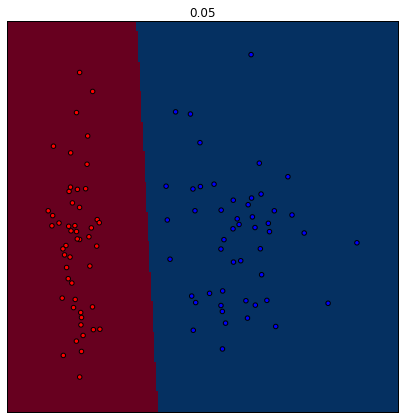

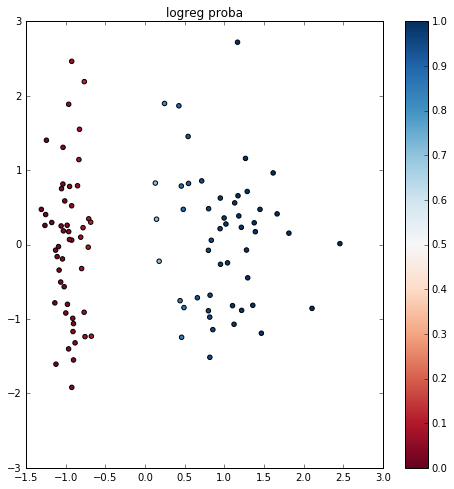

In [28]:
# Lets try that with an algorithm we know...
classif_logreg = LogisticRegression().fit(X, y)

# plot the decision boundaries
decision_boundary_2d(classif_logreg, X, y, 0.05)

# plot the probability
f, ax = plt.subplots(1,1,figsize=(8,8))
plot_scatter_color_1Z(X, classif_logreg.predict_proba(X)[:,1], vmin=0.0, vmax=1.0, title="logreg proba")
plt.show()

## 1. The Perceptron

![title](img/perceptron.png)

We have an <font color='blue'>**input space**</font> made of $N$ samples and $P$ features (and 1 bias term).

We have one <font color='red'>**perceptron**</font> providing a response $y$.

Between <font color='blue'>**input space**</font> and the <font color='red'>**perceptron**</font>, there are weights assigned to the links between each <font color='blue'>input feature $x_i$</font> and the perceptron. These weights are written as a vector $\color{fuchsia}{W^{x \rightarrow y}}$. The weight assigned to the bias term is noted $\color{fuchsia}{W_{0}^{x \rightarrow y}}$.

In [29]:
perceptron_W = np.random.uniform(-1.0, 1.0, [X.shape[1]+1])

print perceptron_W

[ 0.41248445 -0.83730244 -0.83032457]


### 2.1. Activation function

For any given <font color='blue'>**observation X**</font>, the perceptron is activated as defined by:

$$ \color{red}{\hat{y}} = \sigma ( \color{fuchsia}{W_{0}^{x \rightarrow y}} + < \color{fuchsia}{W^{x \rightarrow z}} , \color{blue}{X} > ) \qquad \text{for} \, j = 1, \cdots, M $$

with $\sigma$ the sigmoid function : $\sigma(t) = \frac{1}{1+e^{-t}}$

In [30]:
def perceptron_activation_func(X, W):
    y_out = 1/(1+np.exp( -(W[0] + np.dot(X,W[1:])) ))   
    return(y_out)

In [31]:
perceptron_activation_func(X,perceptron_W)

array([ 0.40495214,  0.73885888,  0.22117155,  0.28871704,  0.42541212,
        0.35483715,  0.74506229,  0.66125682,  0.83244405,  0.57215253,
        0.41694002,  0.36414711,  0.88087829,  0.75688629,  0.70624746,
        0.7526375 ,  0.81355606,  0.27226217,  0.32749913,  0.61823384,
        0.34569125,  0.74275127,  0.6722297 ,  0.75402243,  0.26901643,
        0.20284088,  0.16661406,  0.54334409,  0.75490288,  0.45895291,
        0.73260055,  0.61134633,  0.31069638,  0.22556585,  0.63149617,
        0.41368705,  0.89495667,  0.88818875,  0.88580865,  0.67585564,
        0.84810251,  0.61027798,  0.94147863,  0.67976626,  0.14936674,
        0.72829403,  0.32535318,  0.48809142,  0.6147659 ,  0.43669731,
        0.91548713,  0.34878723,  0.75940083,  0.85930705,  0.5019138 ,
        0.54011224,  0.75996999,  0.93623443,  0.28965648,  0.88047787,
        0.34091015,  0.28961858,  0.18328755,  0.45199343,  0.29001287,
        0.64638584,  0.54245168,  0.68391975,  0.23254447,  0.22

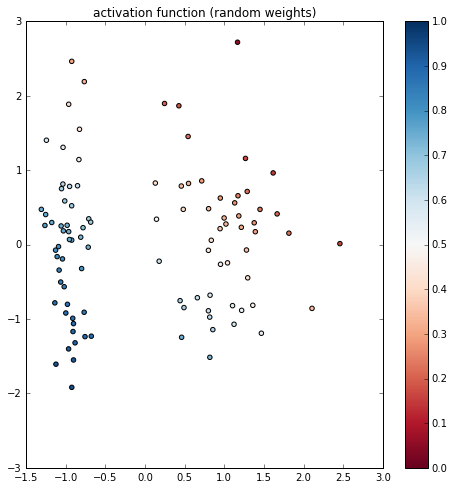

In [32]:
# plot the activation function
f, ax = plt.subplots(1,1,figsize=(8,8))
plot_scatter_color_1Z(X,
                      perceptron_activation_func(X,perceptron_W),
                      vmin=0.0,
                      vmax=1.0,
                      title="activation function (random weights)")
plt.show()

We are going to embed that into a class to plot the decision boundary.

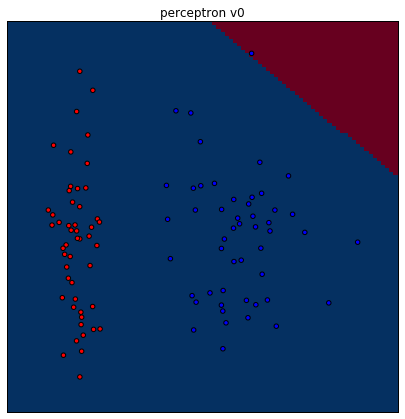

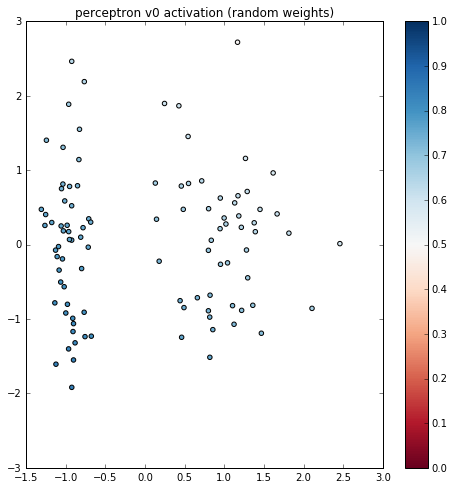

In [33]:
class Perceptron_v0(object):
    
    def fit(self, X, y):
        self.perceptron_W = np.random.uniform(-1.0, 1.0, [X.shape[1]+1, 1])
        return(self)
    
    def perceptron_activation(self, X, W):
        y_out = 1/(1+np.exp( -(W[0] + np.dot(X,W[1:])) ))   
        return(y_out)
    
    def predict(self, X):
        y_out = self.perceptron_activation(X,self.perceptron_W)
        return(y_out > 0.5)

# for this v0, just random weights
clf_perceptron_v0 = Perceptron_v0().fit(X,y)

# let's plot the decision boundary
decision_boundary_2d(clf_perceptron_v0, X, y, "perceptron v0", 0.05)

# plot the activation function
f, ax = plt.subplots(1,1,figsize=(8,8))
plot_scatter_color_1Z(X,
                      clf_perceptron_v0.perceptron_activation(X,clf_perceptron_v0.perceptron_W),
                      vmin=0.0,
                      vmax=1.0,
                      title="perceptron v0 activation (random weights)")
plt.show()

### 2.2. Error on the activation

The error is computed as the difference between the expected value `y` and the activation function. If activation is different from y, we want to correct that.

$$ \epsilon_i = y_i - \hat{y_i} = y_i - \sigma ( \color{fuchsia}{W_{0}^{x \rightarrow y}} + < \color{fuchsia}{W^{x \rightarrow z}} , \color{blue}{X_i} > ) \qquad \text{for} \, i = 1, \cdots, N $$


In [34]:
# let's see what's inside y
y

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
activation = clf_perceptron_v0.perceptron_activation(X,clf_perceptron_v0.perceptron_W)

error_y = y.reshape(len(y),1) - activation

Let's plot the activation for each data point of X.

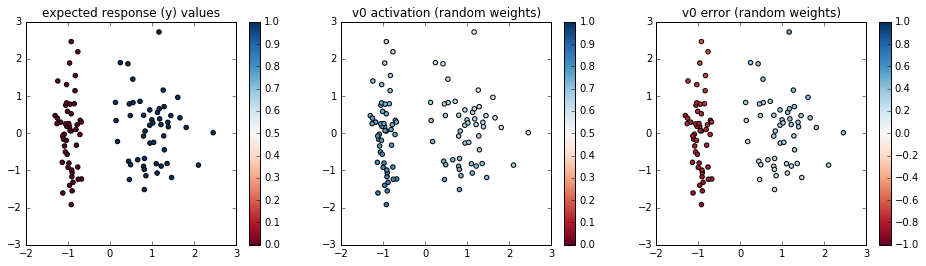

In [36]:
f, ax = plt.subplots(1,3,figsize=(16,4))

# plot the data (right)
plt.subplot(1,3,1)
plot_scatter_color_1Z(X,
                      y,
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="expected response (y) values")

# plot the activation function (center)
plt.subplot(1,3,2)
plot_scatter_color_1Z(X,
                      clf_perceptron_v0.perceptron_activation(X,clf_perceptron_v0.perceptron_W),
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="v0 activation (random weights)")

# plot the error function (left)
plt.subplot(1,3,3)
plot_scatter_color_1Z(X, error_y, vmin=-1.0, vmax=1.0, figsize=(5,5), title="v0 error (random weights)")
plt.show()

### 2.3. Updating weights to fit

We update the weights by going exhaustively through every point.

In [37]:
class Perceptron_v1(object):
    
    def fit(self, X, y):
        self.perceptron_W = np.random.uniform(-1.0, 1.0, [X.shape[1]+1, 1])
        #self.learn_weights(X,y,100)
        return(self)
    
    def perceptron_activation(self, X, W):
        y_out = 1/(1+np.exp( -(W[0] + np.dot(X,W[1:])) ))   
        return(y_out)
    
    def predict(self, X):
        y_out = self.perceptron_activation(X,self.perceptron_W)
        return(y_out > 0.5)

    def learn_weights(self, X, y, epochs):
        for e in xrange(epochs):
            for i in range(X.shape[0]):
                error_i = y[i] - self.perceptron_activation(X[i], self.perceptron_W)
                self.perceptron_W[1:] += 0.05 * error_i * X[i].reshape(2,1)
                self.perceptron_W[0] += 0.05 * error_i * 1

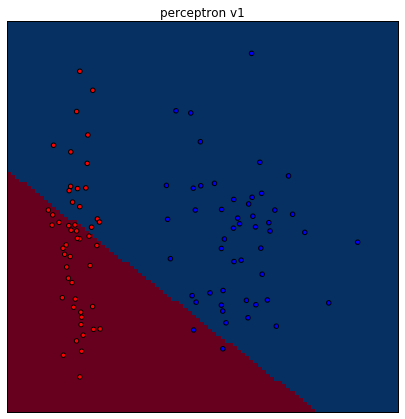

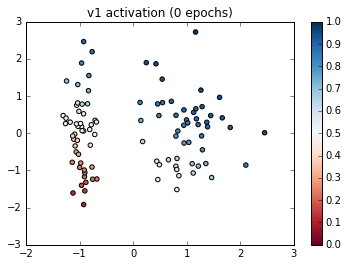

In [38]:
clf_perceptron_v1 = Perceptron_v1().fit(X,y)

# let's plot the decision boundary
decision_boundary_2d(clf_perceptron_v1, X, y, "perceptron v1", 0.05)

# plot the activation function
plot_scatter_color_1Z(X,
                      clf_perceptron_v1.perceptron_activation(X, clf_perceptron_v1.perceptron_W),
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="v1 activation (0 epochs)")

In [39]:
epoch = 1


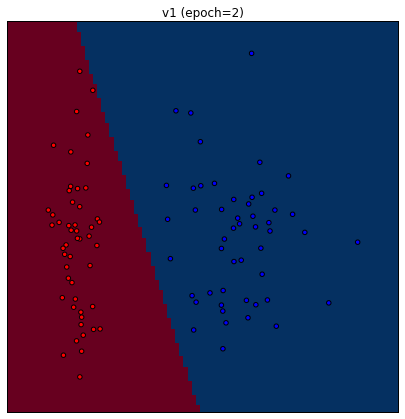

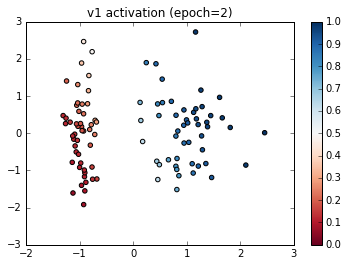

In [40]:
clf_perceptron_v1.learn_weights(X,y, 1)
epoch += 1

# let's plot the decision boundary
decision_boundary_2d(clf_perceptron_v1, X, y, "v1 (epoch={})".format(epoch), 0.05)

# plot the activation function
plot_scatter_color_1Z(X,
                      clf_perceptron_v1.perceptron_activation(X, clf_perceptron_v1.perceptron_W),
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="v1 activation (epoch={})".format(epoch))

In [41]:
clf_perceptron_v1.perceptron_W

array([[ 0.28256248],
       [ 1.91932481],
       [ 0.52017158]])

## 2. Multi-Layer Perceptron

The Multi-Layer Perceptron algorithm is derived from the Perceptron we just have seen. It combines several perceptrons into multiple layers. Each output/activation function from a perceptron in a previous layer is connected to the inputs of a perceptron in the next layer.

Pros :
* Works well with high dimensional data (images, text, audio)
* Can model arbitrarily complicated decision functions

Cons :
* Not interpretable
* Slow to train
* Easy to overfit
* Difficult to tune

### 2.1. Creating a non-trivial dataset for this part

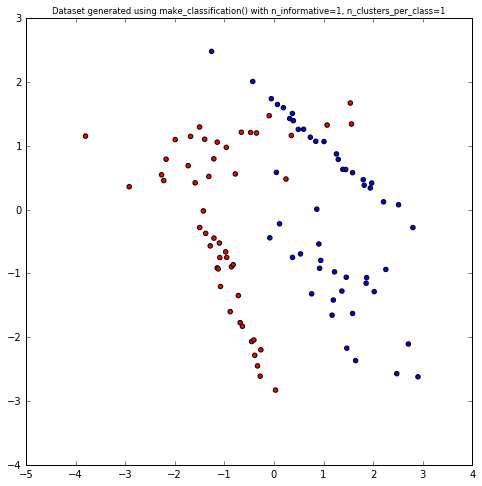

In [42]:
np.random.seed(34) # so that we see the same thing

plt.figure(figsize=(8, 8))
plt.title("Dataset generated using make_classification() with n_informative=1, n_clusters_per_class=1", fontsize='small')

X2, y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2)

def le_rouge_et_le_bleu(y):
    return ['b' if y[i] == 1 else 'r' for i in range(len(y))]
    
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=le_rouge_et_le_bleu(y2))

The Multi-Layer perceptron can be drawn as a schema below. In here, we have only 1 hidden layer.
![title](img/onelayerperceptron.png)

We have an <font color='blue'>**input space**</font> made of $N$ samples and $P$ features and 1 bias term.

We have a <font color='green'>**hidden layer**</font> made of $M$ neurons and 1 bias term.

Between <font color='blue'>**input space**</font> and the <font color='green'>**hidden layer**</font>, there are weights assigned to each of the links between <font color='blue'>input feature $x_i$</font> and <font color='green'>hidden neuron $z_j$</font>. These weights are written as a vector $\color{fuchsia}{W_j^{x \rightarrow z}}$ for each of the <font color='green'>neurons $z_j$</font>.

We have a <font color='red'>**output layer**</font> made of $K$ neurons for each of the $K$ classes.

Between <font color='green'>**hidden layer**</font> and the <font color='red'>**output layer**</font>, there are weights assigned to each of the links between <font color='green'>neurons $z_j$</font> and <font color='red'>output neurons $y_k$</font>. These weights are written as a vector $\color{orange}{W_k^{z \rightarrow y}}$ for each of the <font color='green'>output neurons $y_k$</font>.



In [43]:
# 2 features + 1 bias term = 3 inputs
# hypothesis: 3 neurons on the hidden layer
# 2 classes on output

W_xz = np.random.uniform(-1.0, 1.0, [3,3])

W_zy = np.random.uniform(-1.0, 1.0, [4,1])

### 2.1. Forward Propagation

In the network above, we can compute the response of the network to a new <font color='blue'>**observation X**</font> by operating the following computations.

For each neuron of the <font color='green'>**hidden layer**</font> we compute :
$$ \color{green}{z_j} = tanh ( \color{fuchsia}{W_{0,j}^{x \rightarrow z}} + < \color{fuchsia}{W_j^{x \rightarrow z}} , \color{blue}{X} > ) \qquad \text{for} \, j = 1, \cdots, M $$

with $tanh$ the function : $tanh(t) = \frac{e^{2t}-1}{e^{2t}+1}$

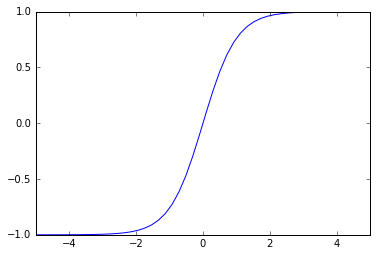

In [44]:
def tanh(t):
    return ((np.exp(2*t) - 1) / (np.exp(2*t) + 1))

xlin = np.linspace(-5,5)
plt.plot(xlin, tanh(xlin))
plt.axis([-5, 5, -1, 1])
plt.show()

In [45]:
activation_Z = tanh(W_xz[0] + np.dot(X2,W_xz[1:]))

Each neuron of the hidden layer has its own activation function. We have 3 neurons in the hidden layer, let's plot the activation values for each.

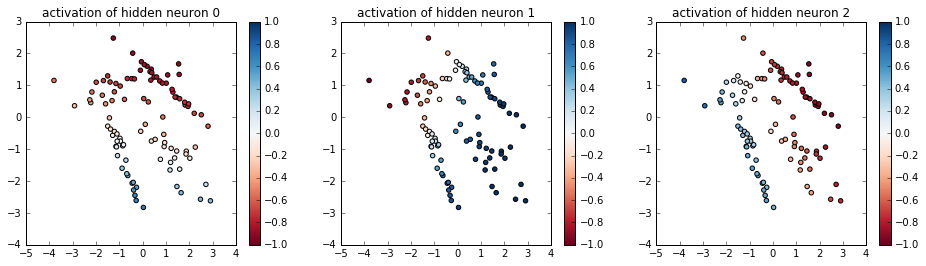

In [46]:
f, ax = plt.subplots(1,3,figsize=(16,4))

# plot the data (right)
plt.subplot(1,3,1)
plot_scatter_color_1Z(X2,
                      activation_Z[:,0],
                      vmin=-1.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of hidden neuron 0")

# plot the activation function (center)
plt.subplot(1,3,2)
plot_scatter_color_1Z(X2,
                      activation_Z[:,1],
                      vmin=-1.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of hidden neuron 1")

# plot the error function (left)
plt.subplot(1,3,3)
plot_scatter_color_1Z(X2,
                      activation_Z[:,2],
                      vmin=-1.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of hidden neuron 2")
plt.show()

Then for each neuron of the <font color='red'>**output layer**</font> we compute :

$$ \color{red}{y_k} = g_k ( \color{orange}{W_{0,k}^{z \rightarrow y}} + < \color{orange}{W_m^{z \rightarrow y}} , \color{green}{Z} > ) \qquad \text{for} \, k = 1, \cdots, K $$

The function $g_k$ should be chosen depending on our objective. If we are using neural nets for regression, using identity is fine.

For classification we usually chose the softmax function : $g_k(T) = \frac{e^{T_k}}{\sum_l e^{T_l}}$. That is the normalized activation reponse at the output of the network so that their sum is equal to 1.

In [47]:
print W_zy.shape
print activation_Z.shape

dotproduct_zy = (W_zy[0] + np.dot(activation_Z, W_zy[1:]))

print dotproduct_zy.shape

(4, 1)
(100, 3)
(100, 1)


In [49]:
def sigmoid(t):
    return(1.0/(1+np.exp(-t)))

activation_Y = sigmoid(dotproduct_zy)

In [50]:
activation_Y[0:10]

array([[ 0.4638231 ],
       [ 0.38916231],
       [ 0.69048584],
       [ 0.45674789],
       [ 0.73217106],
       [ 0.56182223],
       [ 0.74133291],
       [ 0.76820053],
       [ 0.64864019],
       [ 0.39790947]])

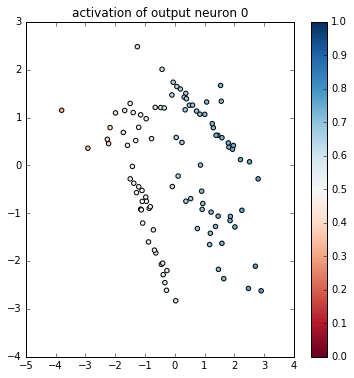

In [51]:
f, ax = plt.subplots(1,1,figsize=(6,6))

# plot the y0 neuron
plt.subplot(1,1,1)
plot_scatter_color_1Z(X2,
                      activation_Y[:,0],
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of output neuron 0")

plt.show()

### 2.3. Back propagation general framework

![title](img/onelayerperceptron.png)

$$ \color{green}{z_j} = tanh ( \color{fuchsia}{W_{0,j}^{x \rightarrow z}} + < \color{fuchsia}{W_j^{x \rightarrow z}} , \color{blue}{X} > ) \qquad \text{for} \, j = 1, \cdots, M $$

$$ \color{red}{\hat{y_k}} = g_k ( \color{orange}{W_{0,k}^{z \rightarrow y}} + < \color{orange}{W_m^{z \rightarrow y}} , \color{green}{Z} > ) \qquad \text{for} \, k = 1, \cdots, K $$

Can also be written in matrix terms :

$$ \color{red}{\hat{y}} \quad = \quad g(\quad \color{orange}{W^{z \rightarrow y}}  \quad \times  \quad \color{green}{tanh( \quad }\color{fuchsia}{W^{x \rightarrow z}}  \quad \times  \quad \color{blue}{X} \color{green}{ \quad )}  \quad  )$$

Let's compute the error on the classification of every observation $x_i$ :
$$ R(\theta) = \sum_{i=1}^N {\sum_{k=1}^K {(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}})^2}} $$

We can compute the partial derivates as follows :

$$ \frac {\partial R_i} {\partial \color{orange}{W_{k,m}^{z \rightarrow y}}} = -2(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}} )g_k'( \quad \color{orange}{W_k^{z \rightarrow y}}^T . \quad z_i \quad ) \quad z_{m,i} $$

$$ \frac {\partial R_i} {\partial \color{fuchsia}{W_{m,l}^{x \rightarrow z}}} = \sum_{k=1}^K -2(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}} )g_k'( \quad \color{orange}{W_k^{z \rightarrow y}}^T . \quad z_i \quad ) \color{orange}{W_{k,m}^{z \rightarrow y}} \tanh'( \quad  \color{fuchsia}{W_m^{x \rightarrow z}}^T . x_i \quad ) x_{i,l}$$

Which translates into a gradient descent update of the weights $\color{fuchsia}{W^{x \rightarrow z}}$ qnd $\color{orange}{W^{z \rightarrow y}}$ as follows :

$$ \color{orange}{W_{k,m}^{z \rightarrow y}}' = \color{orange}{W_{k,m}^{z \rightarrow y}} - \gamma_R \sum_{i=1}^N \delta_{k,i} z_{m,i} $$

$$ \color{fuchsia}{W_{m,l}^{x \rightarrow z}}' = \color{fuchsia}{W_{k,m}^{x \rightarrow z}} - \gamma_R \sum_{i=1}^N s_{m,i} x_{i,l} $$

With :

$$ \delta_{k,i} = -2(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}} )g_k'( \quad \color{orange}{W_k^{z \rightarrow y}}^T . \quad z_i \quad ) $$

$$ s_{m,i} = \sum_{k=1}^K -2(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}} )g_k'( \quad \color{orange}{W_k^{z \rightarrow y}}^T . \quad z_i \quad ) \color{orange}{W_{k,m}^{z \rightarrow y}} \tanh'( \quad  \color{fuchsia}{W_m^{x \rightarrow z}}^T . x_i \quad ) $$

In [52]:
# gamma_r is the learning rate
learning_rate = 0.0005

### 2.4. In practice : Back propagation from OUTPUT to HIDDEN

#### 2.4.1. Error on the output layer

In [53]:
# compute error
error_zy = y.reshape(len(y),1)- activation_Y

print "target:"
print y[0:5]

print "activation_Y:"
print activation_Y[0:5]

print "error_Y:"
print error_zy[0:5]

target:
[1 0 1 1 1]
activation_Y:
[[ 0.4638231 ]
 [ 0.38916231]
 [ 0.69048584]
 [ 0.45674789]
 [ 0.73217106]]
error_Y:
[[ 0.5361769 ]
 [-0.38916231]
 [ 0.30951416]
 [ 0.54325211]
 [ 0.26782894]]


Error for the bias term is the sum of all errors for each output neuron.

In [54]:
np.sum(error_zy)

-11.658034276236648

#### 2.4.2. Using error to update weights between HIDDEN and OUTPUT



$$ \delta_{k,i} = -2(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}} )g_k'( \quad \color{orange}{W_k^{z \rightarrow y}}^T . \quad z_i \quad ) $$

In [55]:
# remember...
# dotproduct_zy = (W_zy[0] + np.dot(activation_Z, W_zy[1:]))
# activation_Y = sigmoid(dotproduct_zy)

delta_zy = - 2 * (error_zy) * activation_Y * (1-activation_Y)

print delta_zy[0:5]

[[-0.26668499]
 [ 0.18501944]
 [-0.13229572]
 [-0.26959348]
 [-0.10504069]]


$$ \color{orange}{W_{k,m}^{z \rightarrow y}}' = \color{orange}{W_{k,m}^{z \rightarrow y}} - \gamma_R \sum_{i=1}^N \delta_{k,i} z_{m,i} $$

In [56]:
W_zy_2 = np.zeros(W_zy.shape)

W_zy_2[1:] = W_zy[1:] - (learning_rate * np.sum(np.dot(delta_zy.T, activation_Z)))

W_zy_2[0] = W_zy[0] - (learning_rate * np.sum(np.dot(delta_zy.T, np.ones(len(activation_Z)))))

In [57]:
print "\nprevious weights on z-y"
print W_zy

print "\nnew weights on z-y"
print W_zy_2


previous weights on z-y
[[ 0.27448674]
 [ 0.23284159]
 [ 0.2739252 ]
 [-0.78427479]]

new weights on z-y
[[ 0.27228096]
 [ 0.23405338]
 [ 0.27513699]
 [-0.78306299]]


### 2.4. In practice : Back propagation from HIDDEN to INPUT

$$ s_{m,i} = \sum_{k=1}^K -2(\color{red}{y_{i,k}}-\color{red}{\hat{y_{i,k}}} )g_k'( \quad \color{orange}{W_k^{z \rightarrow y}}^T . \quad z_i \quad ) \color{orange}{W_{k,m}^{z \rightarrow y}} \tanh'( \quad  \color{fuchsia}{W_m^{x \rightarrow z}}^T . x_i \quad ) $$

$$ s_{m,i} = \tanh'( \quad  \color{fuchsia}{W_m^{x \rightarrow z}}^T . x_i \quad ) \sum_{k=1}^K \delta_{k,i} \color{orange}{W_{k,m}^{z \rightarrow y}}  $$

In [58]:
# remember...
# activation_Z = tanh(W_xz[0] + np.dot(X2,W_xz[1:]))

def tanhprime(t):
    return(1-tanh(t)**2)

s_xz = np.sum(np.dot(delta_zy.T, activation_Z)) * tanhprime(W_xz[0] + np.dot(X2,W_xz[1:]))

In [59]:
W_xz_2 = np.zeros(W_xz.shape)

W_xz_2[1:] = W_xz[1:] - (learning_rate * np.sum(np.dot(s_xz.T, X)))

W_xz_2[0] = W_xz[0] - (learning_rate * np.sum(np.dot(s_xz.T, np.ones(len(X)))))

In [60]:
print "\nprevious weights on x-z"
print W_xz

print "\nnew weights on x-z"
print W_xz_2


previous weights on x-z
[[-0.47370893  0.62441475 -0.34392554]
 [-0.11847782  0.66521464 -0.48839497]
 [-0.4775257  -0.35011737 -0.30952452]]

new weights on x-z
[[-0.25171395  0.84640973 -0.12193056]
 [-0.09146721  0.69222525 -0.46138436]
 [-0.45051509 -0.32310676 -0.28251391]]


### 2.5. We're all in this together...

In [61]:
def plot_neurons_activation(X2, y2, activation_Z, activation_Y):
    f, ax = plt.subplots(2,3,figsize=(14,8))

    # plot the data (right)
    plt.subplot(2,3,1)
    plot_scatter_color_1Z(X2,
                      activation_Z[:,0],
                      vmin=-1.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of hidden neuron 0")

    # plot the activation function (center)
    plt.subplot(2,3,2)
    plot_scatter_color_1Z(X2,
                      activation_Z[:,1],
                      vmin=-1.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of hidden neuron 1")

    # plot the error function (left)
    plt.subplot(2,3,3)
    plot_scatter_color_1Z(X2,
                      activation_Z[:,2],
                      vmin=-1.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of hidden neuron 2")

    # plot the y0 neuron
    plt.subplot(2,3,4)
    plot_scatter_color_1Z(X2,
                      activation_Y[:,0],
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of output neuron 0")

    plt.subplot(2,3,5)
    plot_scatter_color_1Z(X2,
                      (activation_Y[:,0] > 0.5) * 0.7,
                      vmin=0.0,
                      vmax=1.0,
                      figsize=(5,5),
                      title="activation of output neuron 0")

    plt.show()

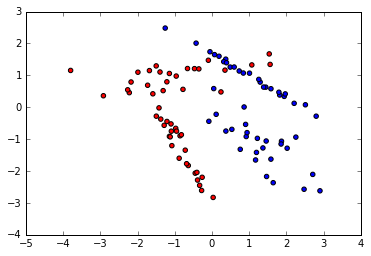

In [62]:
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=le_rouge_et_le_bleu(y2))

# gamma_r is the learning rate
learning_rate = 0.0005
epochs = 1000

def tanh(t):
    return ((np.exp(2*t) - 1) / (np.exp(2*t) + 1))

def tanhprime(t):
    return(1-tanh(t)**2)

def sigmoid(t):
    return(1.0/(1+np.exp(-t)))

# 2 features + 1 bias term = 3 inputs
# hypothesis: 3 neurons on the hidden layer
# binominal classes as output (1 sigmoid)
np.random.seed(3) # so that we see the same thing

W_xz = np.random.uniform(-1.0, 1.0, [3,3])
W_zy = np.random.uniform(-1.0, 1.0, [4,1])

INITIAL RANDOM WEIGHTS


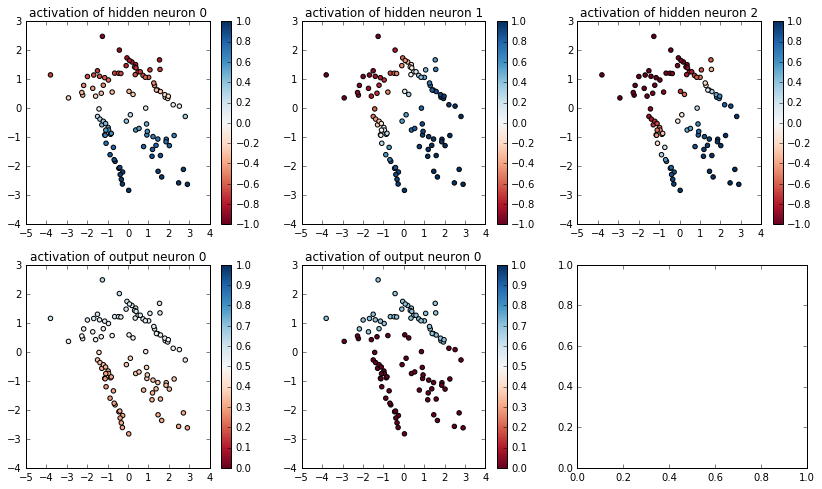

In [63]:
# forward propagation X-Z
activation_Z = tanh(W_xz[0] + np.dot(X2,W_xz[1:]))

dotproduct_zy = (W_zy[0] + np.dot(activation_Z, W_zy[1:]))

# forward propagation Z-Y
activation_Y = sigmoid(dotproduct_zy)

print "INITIAL RANDOM WEIGHTS"
plot_neurons_activation(X2, y2, activation_Z, activation_Y)

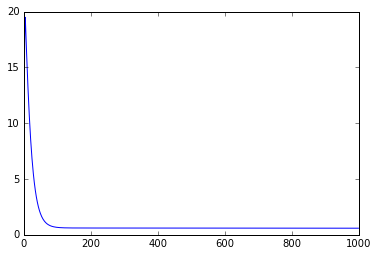

In [64]:
error_array = np.empty(epochs)

for e in range(epochs):
    # forward propagation X-Z
    activation_Z = tanh(W_xz[0] + np.dot(X2,W_xz[1:]))

    dotproduct_zy = (W_zy[0] + np.dot(activation_Z, W_zy[1:]))

    # forward propagation Z-Y
    #activation_Y = np.exp(dotproduct_zy) / np.sum(np.exp(dotproduct_zy),axis=1).reshape(len(y),1)
    activation_Y = sigmoid(dotproduct_zy)
    
    # error on the output layer
    error_zy = y.reshape(len(y),1) - activation_Y
    error_array[e] = np.sum(error_zy, axis=0)[0]

    #print "beforeZY: %s" % W_zy
    # back propagation to hidden layer
    delta_zy = - 2 * (error_zy) * activation_Y * (1-activation_Y)
    W_zy[1:] += - (learning_rate * np.sum(np.dot(delta_zy.T, activation_Z)))
    W_zy[0] += - (learning_rate * np.sum(np.dot(delta_zy.T, np.ones(len(activation_Z)))))
    #print "afterZY: %s" % W_zy

    # back propagation to input layer
    s_xz = np.sum(np.dot(delta_zy.T, activation_Z)) * tanhprime(W_xz[0] + np.dot(X2,W_xz[1:]))
    W_xz[1:] += - (learning_rate * np.sum(np.dot(s_xz.T, X)))
    W_xz[0] += - (learning_rate * np.sum(np.dot(s_xz.T, np.ones(len(X)))))
    
    #print W_zy
    #print W_zy_2
    
    #W_zy = W_zy_2
    #W_xz = W_xz_2
    
plt.plot(error_array)


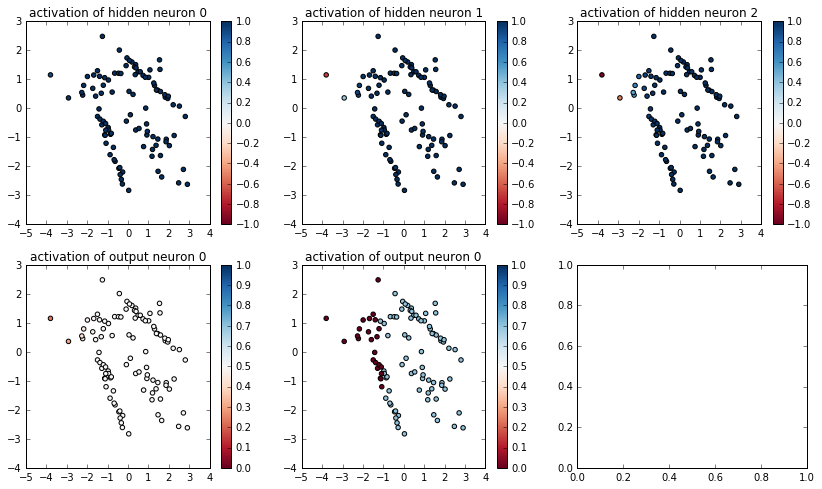

In [65]:
plot_neurons_activation(X2, y2, activation_Z, activation_Y)